# Combined

In [1]:
import pandas as pd
import nltk
from collections import defaultdict

# Function to count words in a sentence
def count_words(sentence):
    return len(nltk.word_tokenize(sentence))

# List of CSV files to read
csv_files = ['train.csv', 'test.csv', 'dev.csv']  # Update with your CSV file paths
text_column = 'label'  # Update with the name of the text column in your CSV files

# Read all CSV files and concatenate them into one DataFrame
dataframes = [pd.read_csv(csv_file) for csv_file in csv_files]
combined_df = pd.concat(dataframes, ignore_index=True)

sentences_length_count = defaultdict(int)
longest_sentence = ''
longest_sentence_length = 0
row_count = 0  # Initialize row count

# Process each row in the combined DataFrame
for text in combined_df[text_column]:
    row_count += 1  # Increment row count
    sentences = nltk.sent_tokenize(text)
    for sentence in sentences:
        words_count = count_words(sentence)
        sentences_length_count[words_count] += 1
        if words_count > longest_sentence_length:
            longest_sentence_length = words_count
            longest_sentence = sentence

print(f"Total number of rows: {row_count}")
print(f"Longest sentence: '{longest_sentence}' with {longest_sentence_length} words")

for length, count in sorted(sentences_length_count.items()):
    print(f"{count} sentences with {length} {'word' if length == 1 else 'words'}")

Total number of rows: 7119
Longest sentence: 'I AM PROUD OF YOU!' with 6 words
4703 sentences with 1 word
316 sentences with 2 words
477 sentences with 3 words
883 sentences with 4 words
518 sentences with 5 words
222 sentences with 6 words


In [2]:
from collections import Counter
import nltk

all_words = []
for text in combined_df[text_column]:
    words = nltk.word_tokenize(text)
    all_words.extend(words)

word_freq = Counter(all_words)
print(word_freq.most_common(10))  # Print the 10 most common words

[('.', 1110), ('YOU', 781), ('I', 755), ('AM', 533), ('ARE', 401), ('!', 370), ('IS', 333), ('NOT', 290), ('GOOD', 234), ('SLOW', 164)]


In [3]:
from nltk.util import ngrams

bigrams = list(ngrams(all_words, 2))
trigrams = list(ngrams(all_words, 3))

bigram_freq = Counter(bigrams)
trigram_freq = Counter(trigrams)

print(bigram_freq.most_common(10))  # Print the 10 most common bigrams
print(trigram_freq.most_common(10))  # Print the 10 most common trigrams

[(('I', 'AM'), 533), (('YOU', 'ARE'), 274), (('DO', 'NOT'), 142), (('ARE', 'YOU'), 127), (('.', 'I'), 119), (('TIRED', '.'), 111), (('LIKE', 'YOU'), 111), (('YOU', '.'), 111), (('MY', 'HEAD'), 111), (('HEAD', 'IS'), 111)]
[(('MY', 'HEAD', 'IS'), 111), (('HOW', 'ARE', 'YOU'), 90), (('I', 'AM', 'FINE'), 89), (('.', 'I', 'AM'), 88), (('LIKE', 'YOU', '.'), 74), (('YOU', 'ARE', 'SICK'), 74), (('ARE', 'YOU', '?'), 74), (('I', 'LIKE', 'YOU'), 74), (('NICE', 'TO', 'MEET'), 54), (('TO', 'MEET', 'YOU'), 54)]


In [4]:
import pandas as pd

# Function to extract 'x/y' format
def extract_unique_path(path):
    normalized_path = path.replace('\\', '/')
    parts = normalized_path.split('/')
    if len(parts) >= 2:
        return '/'.join(parts[:2])
    return None  # For paths that don't have a subfolder

# Apply the function to the 'vid_path' column
combined_df['unique_path'] = combined_df['vid_path'].apply(extract_unique_path)

# Display the first few rows to verify
print(combined_df[['vid_path', 'unique_path']].head())

          vid_path unique_path
0  clips\95\14.MOV    clips/95
1  clips\25\12.MOV    clips/25
2   clips\1\24.MOV     clips/1
3  clips\47\25.MOV    clips/47
4   clips\16\1.MOV    clips/16


In [5]:
# Count occurrences of 'clips'
clips_count = combined_df['vid_path'].str.contains('clips', case=False, na=False).sum()

# Count occurrences of 'videos'
videos_count = combined_df['vid_path'].str.contains('videos', case=False, na=False).sum()

# Print the results
print(f"Total number of 'clips': {clips_count}")
print(f"Total number of 'videos': {videos_count}")

Total number of 'clips': 5491
Total number of 'videos': 1628


In [6]:
# Calculate the counts of each unique path
path_counts = combined_df['unique_path'].value_counts()

# Find the path with the maximum occurrence
max_path = path_counts.idxmax()
max_count = path_counts.max()

# Find the path with the minimum occurrence
min_path = path_counts.idxmin()
min_count = path_counts.min()

# Display results
print(f"The path with the most occurrences is '{max_path}' with {max_count} occurrences.")
print(f"The path with the least occurrences is '{min_path}' with {min_count} occurrences.")

The path with the most occurrences is 'clips/2' with 54 occurrences.
The path with the least occurrences is 'videos/4' with 37 occurrences.


In [7]:
import pandas as pd
from IPython.display import display, HTML

# Create a long Series
data = path_counts

# Convert the Series to an HTML string
series_html = data.to_frame().to_html()

# Create a scrollable output
scrollable_series = f"""
<div style="max-height: 200px; overflow-y: scroll; border: 1px solid #ccc;">
    {series_html}
</div>
"""

# Display the scrollable output
display(HTML(scrollable_series))

,unique_path
clips/2,54
clips/17,54
clips/41,54
clips/6,54
clips/40,54
clips/37,54
clips/60,53
clips/14,53
clips/58,53
clips/96,53


## FSL-105

In [8]:
import pandas as pd
import nltk
from collections import defaultdict

# Function to count words in a sentence
def count_words(sentence):
    return len(nltk.word_tokenize(sentence))

# List of CSV files to read
csv_files = ['train.csv', 'test.csv', 'dev.csv']  # Update with your CSV file paths
text_column = 'label'  # Update with the name of the text column in your CSV files
vid_path_column = 'vid_path'  # Update with the name of the vid_path column in your CSV files

# Read all CSV files and concatenate them into one DataFrame
dataframes = [pd.read_csv(csv_file) for csv_file in csv_files]
combined_df = pd.concat(dataframes, ignore_index=True)

# Filter rows where the 'vid_path' column contains the string "clips"
filtered_df = combined_df[combined_df[vid_path_column].str.contains("clips", na=False)]

sentences_length_count = defaultdict(int)
longest_sentence = ''
longest_sentence_length = 0
row_count = 0  # Initialize row count

# Process each row in the filtered DataFrame
for text in filtered_df[text_column]:
    row_count += 1  # Increment row count
    sentences = nltk.sent_tokenize(text)
    for sentence in sentences:
        words_count = count_words(sentence)
        sentences_length_count[words_count] += 1
        if words_count > longest_sentence_length:
            longest_sentence_length = words_count
            longest_sentence = sentence

print(f"Total number of rows: {row_count}")
print(f"Longest sentence: '{longest_sentence}' with {longest_sentence_length} words")

for length, count in sorted(sentences_length_count.items()):
    print(f"{count} sentences with {length} {'word' if length == 1 else 'words'}")

Total number of rows: 5491
Longest sentence: 'NICE TO MEET YOU' with 4 words
4703 sentences with 1 word
316 sentences with 2 words
366 sentences with 3 words
106 sentences with 4 words


## FSL-NMS

In [9]:
import pandas as pd
import nltk
from collections import defaultdict

# Function to count words in a sentence
def count_words(sentence):
    return len(nltk.word_tokenize(sentence))

# List of CSV files to read
csv_files = ['train.csv', 'test.csv', 'dev.csv']  # Update with your CSV file paths
text_column = 'label'  # Update with the name of the text column in your CSV files
vid_path_column = 'vid_path'  # Update with the name of the vid_path column in your CSV files

# Read all CSV files and concatenate them into one DataFrame
dataframes = [pd.read_csv(csv_file) for csv_file in csv_files]
combined_df = pd.concat(dataframes, ignore_index=True)

# Filter rows where the 'vid_path' column contains the string "videos"
filtered_df = combined_df[combined_df[vid_path_column].str.contains("videos", na=False)]

sentences_length_count = defaultdict(int)
longest_sentence = ''
longest_sentence_length = 0
row_count = 0  # Initialize row count

# Process each row in the filtered DataFrame
for text in filtered_df[text_column]:
    row_count += 1  # Increment row count
    sentences = nltk.sent_tokenize(text)
    for sentence in sentences:
        words_count = count_words(sentence)
        sentences_length_count[words_count] += 1
        if words_count > longest_sentence_length:
            longest_sentence_length = words_count
            longest_sentence = sentence

print(f"Total number of rows: {row_count}")
print(f"Longest sentence: '{longest_sentence}' with {longest_sentence_length} words")

for length, count in sorted(sentences_length_count.items()):
    print(f"{count} sentences with {length} {'word' if length == 1 else 'words'}")

Total number of rows: 1628
Longest sentence: 'I AM PROUD OF YOU!' with 6 words
111 sentences with 3 words
777 sentences with 4 words
518 sentences with 5 words
222 sentences with 6 words


# Test

In [10]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('test.csv')  

# Function to extract 'x/y' format
def extract_unique_path(path):
    normalized_path = path.replace('\\', '/')
    parts = normalized_path.split('/')
    if len(parts) >= 2:
        return '/'.join(parts[:2])
    return None  # For paths that don't have a subfolder

# Apply the function to the 'vid_path' column
df['unique_path'] = df['vid_path'].apply(extract_unique_path)

# Display the first few rows to verify
print(df[['vid_path', 'unique_path']].head())

          vid_path unique_path
0  videos/23/1.mp4   videos/23
1  clips\25\50.MOV    clips/25
2  clips\70\32.MOV    clips/70
3   clips\74\5.MOV    clips/74
4  clips\37\16.MOV    clips/37


In [11]:
import csv
import nltk
from collections import defaultdict

# Function to count words in a sentence
def count_words(sentence):
    return len(nltk.word_tokenize(sentence))

# Read the CSV file
csv_file = 'test.csv'  # Update with your CSV file path
text_column = 'label'  # Update with the name of the text column in your CSV file

with open(csv_file, mode='r') as file:
    reader = csv.DictReader(file)
    sentences_length_count = defaultdict(int)
    longest_sentence = ''
    longest_sentence_length = 0
    row_count = 0  # Initialize row count

    for row in reader:
        row_count += 1  # Increment row count
        text = row[text_column]
        sentences = nltk.sent_tokenize(text)
        for sentence in sentences:
            words_count = count_words(sentence)
            sentences_length_count[words_count] += 1
            if words_count > longest_sentence_length:
                longest_sentence_length = words_count
                longest_sentence = sentence

    print(f"Total number of rows: {row_count}")
    print(f"Longest sentence: '{longest_sentence}' with {longest_sentence_length} words")

    for length, count in sorted(sentences_length_count.items()):
        print(f"{count} sentences with {length} {'word' if length == 1 else 'words'}")


Total number of rows: 1068
Longest sentence: 'I LIKE YOU VERY MUCH.' with 6 words
720 sentences with 1 word
48 sentences with 2 words
71 sentences with 3 words
126 sentences with 4 words
71 sentences with 5 words
32 sentences with 6 words


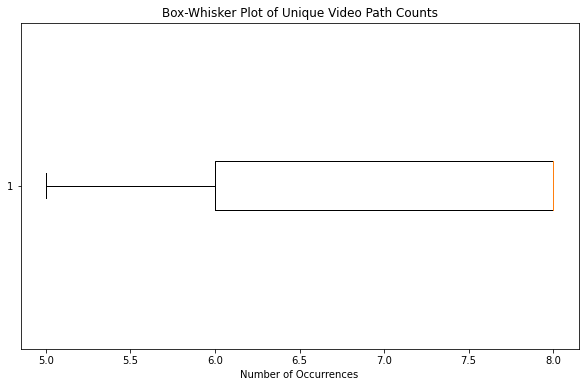

In [12]:
# Count the number of occurrences of each unique path
path_counts = df['unique_path'].value_counts()

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.boxplot(path_counts, vert=False)  # 'vert=False' for a horizontal boxplot
plt.title('Box-Whisker Plot of Unique Video Path Counts')
plt.xlabel('Number of Occurrences')
plt.show()

In [13]:
# Calculate the counts of each unique path
path_counts = df['unique_path'].value_counts()

# Find the path with the maximum occurrence
max_path = path_counts.idxmax()
max_count = path_counts.max()

# Find the path with the minimum occurrence
min_path = path_counts.idxmin()
min_count = path_counts.min()

# Display results
print(f"The path with the most occurrences is '{max_path}' with {max_count} occurrences.")
print(f"The path with the least occurrences is '{min_path}' with {min_count} occurrences.")


The path with the most occurrences is 'clips/20' with 8 occurrences.
The path with the least occurrences is 'videos/20' with 5 occurrences.


In [14]:
import pandas as pd
from IPython.display import display, HTML

# Create a long Series
data = path_counts

# Convert the Series to an HTML string
series_html = data.to_frame().to_html()

# Create a scrollable output
scrollable_series = f"""
<div style="max-height: 200px; overflow-y: scroll; border: 1px solid #ccc;">
    {series_html}
</div>
"""

# Display the scrollable output
display(HTML(scrollable_series))

,unique_path
clips/20,8
clips/53,8
clips/93,8
clips/68,8
clips/62,8
clips/75,8
clips/24,8
clips/13,8
clips/4,8
clips/69,8


# Dev

In [15]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('dev.csv')  

# Function to extract 'x/y' format
def extract_unique_path(path):
    normalized_path = path.replace('\\', '/')
    parts = normalized_path.split('/')
    if len(parts) >= 2:
        return '/'.join(parts[:2])
    return None  # For paths that don't have a subfolder

# Apply the function to the 'vid_path' column
df['unique_path'] = df['vid_path'].apply(extract_unique_path)

# Display the first few rows to verify
print(df[['vid_path', 'unique_path']].head())

          vid_path unique_path
0  clips\76\38.MOV    clips/76
1  clips\89\16.MOV    clips/89
2  clips\96\31.MOV    clips/96
3  clips\86\49.MOV    clips/86
4  videos/38/8.mp4   videos/38


In [16]:
import csv
import nltk
from collections import defaultdict

# Function to count words in a sentence
def count_words(sentence):
    return len(nltk.word_tokenize(sentence))

# Read the CSV file
csv_file = 'dev.csv'  # Update with your CSV file path
text_column = 'label'  # Update with the name of the text column in your CSV file

with open(csv_file, mode='r') as file:
    reader = csv.DictReader(file)
    sentences_length_count = defaultdict(int)
    longest_sentence = ''
    longest_sentence_length = 0
    row_count = 0  # Initialize row count

    for row in reader:
        row_count += 1  # Increment row count
        text = row[text_column]
        sentences = nltk.sent_tokenize(text)
        for sentence in sentences:
            words_count = count_words(sentence)
            sentences_length_count[words_count] += 1
            if words_count > longest_sentence_length:
                longest_sentence_length = words_count
                longest_sentence = sentence

    print(f"Total number of rows: {row_count}")
    print(f"Longest sentence: '{longest_sentence}' with {longest_sentence_length} words")

    for length, count in sorted(sentences_length_count.items()):
        print(f"{count} sentences with {length} {'word' if length == 1 else 'words'}")

Total number of rows: 1068
Longest sentence: 'I AM PROUD OF YOU!' with 6 words
695 sentences with 1 word
47 sentences with 2 words
72 sentences with 3 words
137 sentences with 4 words
83 sentences with 5 words
34 sentences with 6 words


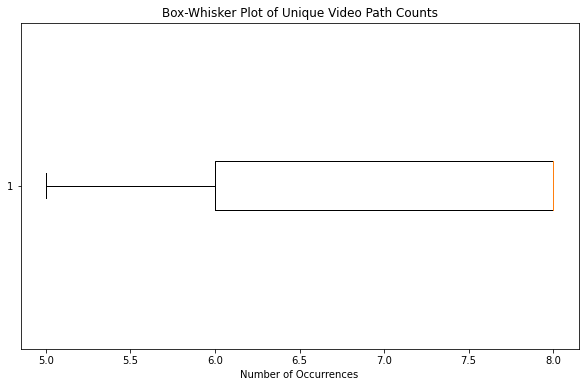

In [17]:
# Count the number of occurrences of each unique path
path_counts = df['unique_path'].value_counts()

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.boxplot(path_counts, vert=False)  # 'vert=False' for a horizontal boxplot
plt.title('Box-Whisker Plot of Unique Video Path Counts')
plt.xlabel('Number of Occurrences')
plt.show()

In [18]:
# Calculate the counts of each unique path
path_counts = df['unique_path'].value_counts()

# Find the path with the maximum occurrence
max_path = path_counts.idxmax()
max_count = path_counts.max()

# Find the path with the minimum occurrence
min_path = path_counts.idxmin()
min_count = path_counts.min()

# Display results
print(f"The path with the most occurrences is '{max_path}' with {max_count} occurrences.")
print(f"The path with the least occurrences is '{min_path}' with {min_count} occurrences.")


The path with the most occurrences is 'clips/76' with 8 occurrences.
The path with the least occurrences is 'videos/2' with 5 occurrences.


In [19]:
import pandas as pd
from IPython.display import display, HTML

# Create a long Series
data = path_counts

# Convert the Series to an HTML string
series_html = data.to_frame().to_html()

# Create a scrollable output
scrollable_series = f"""
<div style="max-height: 200px; overflow-y: scroll; border: 1px solid #ccc;">
    {series_html}
</div>
"""

# Display the scrollable output
display(HTML(scrollable_series))

,unique_path
clips/76,8
clips/98,8
clips/3,8
clips/78,8
clips/62,8
clips/90,8
clips/103,8
clips/50,8
clips/39,8
clips/93,8


# Train

In [20]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('train.csv')  

# Function to extract 'x/y' format
def extract_unique_path(path):
    normalized_path = path.replace('\\', '/')
    parts = normalized_path.split('/')
    if len(parts) >= 2:
        return '/'.join(parts[:2])
    return None  # For paths that don't have a subfolder

# Apply the function to the 'vid_path' column
df['unique_path'] = df['vid_path'].apply(extract_unique_path)

# Display the first few rows to verify
print(df[['vid_path', 'unique_path']].head())

          vid_path unique_path
0  clips\95\14.MOV    clips/95
1  clips\25\12.MOV    clips/25
2   clips\1\24.MOV     clips/1
3  clips\47\25.MOV    clips/47
4   clips\16\1.MOV    clips/16


In [21]:
import csv
import nltk
from collections import defaultdict

# Function to count words in a sentence
def count_words(sentence):
    return len(nltk.word_tokenize(sentence))

# Read the CSV file
csv_file = 'train.csv'  # Update with your CSV file path
text_column = 'label'  # Update with the name of the text column in your CSV file

with open(csv_file, mode='r') as file:
    reader = csv.DictReader(file)
    sentences_length_count = defaultdict(int)
    longest_sentence = ''
    longest_sentence_length = 0
    row_count = 0  # Initialize row count

    for row in reader:
        row_count += 1  # Increment row count
        text = row[text_column]
        sentences = nltk.sent_tokenize(text)
        for sentence in sentences:
            words_count = count_words(sentence)
            sentences_length_count[words_count] += 1
            if words_count > longest_sentence_length:
                longest_sentence_length = words_count
                longest_sentence = sentence

    print(f"Total number of rows: {row_count}")
    print(f"Longest sentence: '{longest_sentence}' with {longest_sentence_length} words")

    for length, count in sorted(sentences_length_count.items()):
        print(f"{count} sentences with {length} {'word' if length == 1 else 'words'}")

Total number of rows: 4983
Longest sentence: 'I AM PROUD OF YOU!' with 6 words
3288 sentences with 1 word
221 sentences with 2 words
334 sentences with 3 words
620 sentences with 4 words
364 sentences with 5 words
156 sentences with 6 words


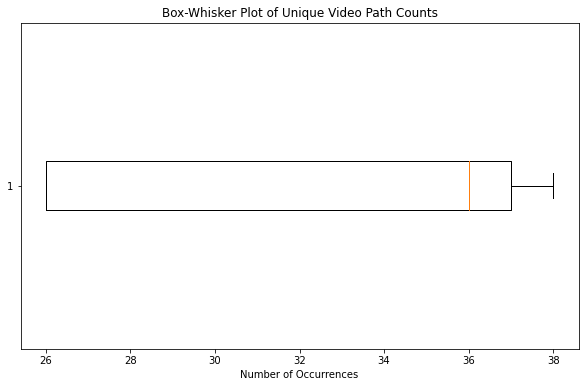

In [22]:
# Count the number of occurrences of each unique path
path_counts = df['unique_path'].value_counts()

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.boxplot(path_counts, vert=False)  # 'vert=False' for a horizontal boxplot
plt.title('Box-Whisker Plot of Unique Video Path Counts')
plt.xlabel('Number of Occurrences')
plt.show()

In [23]:
# Calculate the counts of each unique path
path_counts = df['unique_path'].value_counts()

# Find the path with the maximum occurrence
max_path = path_counts.idxmax()
max_count = path_counts.max()

# Find the path with the minimum occurrence
min_path = path_counts.idxmin()
min_count = path_counts.min()

# Display results
print(f"The path with the most occurrences is '{max_path}' with {max_count} occurrences.")
print(f"The path with the least occurrences is '{min_path}' with {min_count} occurrences.")


The path with the most occurrences is 'clips/40' with 38 occurrences.
The path with the least occurrences is 'videos/46' with 26 occurrences.


In [24]:
import pandas as pd
from IPython.display import display, HTML

# Create a long Series
data = path_counts

# Convert the Series to an HTML string
series_html = data.to_frame().to_html()

# Create a scrollable output
scrollable_series = f"""
<div style="max-height: 200px; overflow-y: scroll; border: 1px solid #ccc;">
    {series_html}
</div>
"""

# Display the scrollable output
display(HTML(scrollable_series))

,unique_path
clips/40,38
clips/6,38
clips/17,38
clips/41,38
clips/2,38
clips/37,38
clips/22,37
clips/92,37
clips/66,37
clips/4,37


# Phoenix

In [25]:
import pandas as pd
import nltk
from collections import defaultdict

# Function to count words in a sentence
def count_words(sentence):
    return len(nltk.word_tokenize(sentence))

# List of CSV files to read
csv_files = ['PHOENIX-2014-T.train.corpus.csv', 'PHOENIX-2014-T.test.corpus.csv', 'PHOENIX-2014-T.dev.corpus.csv']  # Update with your CSV file paths
text_column = 'translation'  # Update with the name of the text column in your CSV files

# Read all CSV files and concatenate them into one DataFrame
dataframes = [pd.read_csv(csv_file) for csv_file in csv_files]
combined_df = pd.concat(dataframes, ignore_index=True)

sentences_length_count = defaultdict(int)
longest_sentence = ''
longest_sentence_length = 0
row_count = 0  # Initialize row count

# Process each row in the combined DataFrame
for text in combined_df[text_column]:
    row_count += 1  # Increment row count
    sentences = nltk.sent_tokenize(text)
    for sentence in sentences:
        words_count = count_words(sentence)
        sentences_length_count[words_count] += 1
        if words_count > longest_sentence_length:
            longest_sentence_length = words_count
            longest_sentence = sentence

print(f"Total number of rows: {row_count}")
print(f"Longest sentence: '{longest_sentence}' with {longest_sentence_length} words")

for length, count in sorted(sentences_length_count.items()):
    print(f"{count} sentences with {length} {'word' if length == 1 else 'words'}")

Total number of rows: 8257
Longest sentence: 'auch wenn der sommer aktuell seinen namen nicht so ganz verdient hat wird es doch in den nächsten tagen jeden tag von südwesten her ein bisschen wärmer sodass wir dann am sonntag auch in deutschland wieder bei etwa zwanzig bis neunundzwanzig grad sein werden dabei im norden etwas kühler als im süden' with 52 words
1 sentences with 1 word
8 sentences with 2 words
31 sentences with 3 words
206 sentences with 4 words
166 sentences with 5 words
231 sentences with 6 words
326 sentences with 7 words
398 sentences with 8 words
472 sentences with 9 words
921 sentences with 10 words
586 sentences with 11 words
583 sentences with 12 words
588 sentences with 13 words
536 sentences with 14 words
461 sentences with 15 words
439 sentences with 16 words
391 sentences with 17 words
317 sentences with 18 words
263 sentences with 19 words
264 sentences with 20 words
203 sentences with 21 words
160 sentences with 22 words
147 sentences with 23 words
118 sente